# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Nir Tevet| nir.tevet@campus.technion.ac.il| 208731422|
|Gal Granot| gal.granot@campus.technion.ac.il| 315681593|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw3_id1_id2.zip` with content:
        * `ece046211_hw3_id1_id2.ipynb` - the code tasks
        * `ece046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Transformers Efficiency](#-Question-1---Transformers-Efficeincy)
    * [Q2 - Preventing Variance Explosion](#-Question-2---Preventing-Variance-Explosion)
    * [Q3 - Recurrent Neural Networks](#-Question-3---Recurrent-Neural-Networks)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Transformers Efficeincy
---
For a series of $T$ values, each with $d$ features $X \in \mathbb{R}^{T \times d}$, a Self-Attention (SA) layer with parameters $$W_Q \in \mathbb{R}^{d \times D}, W_K \in \mathbb{R}^{d \times D}, W_V \in \mathbb{R}^{d \times M} $$ is defined as:

(1) $Q=XW_Q, K=XW_K, V=XW_V$.

(2) $SA(X)=V'=\text{softmax}\left(\frac{QK^T}{\sqrt{D}}\right)V$.

We will now look at an Encoder-Decoder Transformer.

1. Give an example usage for this kind of architecture.
2. Shortly explain each of the following component: Positional Encoding, AddNorm, Feed Forward.
3. Exaplain the difference between the Encoder and Decoder components.
4. One of the issues in computing SA is the computation speed and the memory required for this computation. How many multiplications are required for calculation of a single SA layer, as defined in Equation 2 (without the computation needed for Equation 1).
5. We will now see how to make this computation more efficient. We define a similarity function between the vectors $q \in \mathbb{R}^{1 \times D}$ and $k \in \mathbb{R}^{1 \times D}$ as follows: $$ \text{sim}(q,k)=\exp\left(\frac{qk^T}{\sqrt{D}}\right). $$ Show that the expression for the $i^{th}$ value in the series ($1 \leq i \leq T$):<br>
   (3) $ V_i'=\frac{\sum_{j=1}^{T}\text{sim}(Q_i, K_j)V_j}{\sum_{r=1}^{T}\text{sim}(Q_i, K_r)}$
   is equivalent to Equation 2 above, where a matrix with index $i$ denotes the $i^{th}$ row in the matrix. For example, $Q_i$ denotes the vector of the $i^{th}$ row of the matrix $Q$.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Preventing Variance Explosion
---
This question relates to lectures 8-9 (from slide 7):

Find an initializtion scheme such that $$ \forall l, i,: \text{(1) } \mathbb{E}\left[F_l(u_l)|u_l\right]=0, \text{ (2) } Var(u_l[i]) = 1, $$ assuming skip connections: $u_{l+1} = u_l + F_l(u_l)$ with a single skip $F_l(u_l)=W_l\phi(u_l)+b_l$ and the activation is ReLU: $\phi(x) = \text{ReLU}(x) = \max(0,x)$.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Recurrent Neural Networks
---
You are given a recurrent/feedback neural network with LReLU activations $\phi(u) = \max[pu,u]$, with input $x_t$ and a representation $v_t \in \mathbb{R}^d$ that is updated as follows:
$$ \forall \tau=1,2,...t\:: v_{\tau}=\phi(u_{\tau})\:, u_{\tau} = Wv_{\tau - 1} + B x_{\tau},$$
from initialization $v_0$, and outputs $\hat{y}_t=Cv_t$. The network is trained with GD on a single long series $\{x_{\tau}, y_{\tau}\}_{\tau=1}^t$ with a cost function $\ell(y_t, \hat{y}_t)$ over the last term in the series.

1. Calculate the exact gradient $\frac{\partial \ell}{\partial W[i,j]}$ using Backpropagation through time (BPTT).
2. Recall that calculating the gradient using the method in the previous section there are two issues for $t \to \infty$: (1) the required computational resources grow indefinitely, and (2) the gradients explode or vanish. For each problem: explain it, provide an example for a method to alleviate it and describe any limitations of this method.

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [ ]:
# this part uses the Wikitext-2 dataset. To access torchtext datasets, please install `torchdata`:
# `pip install torchdata` ir `conda install -c pytorch torchdata` in activated environment
# or `!pip install torchdata` on colab.
!pip install torchdata
# notes:
# torch=2.0.0 <-> torchtext 0.15.1
# torch=1.13.0 <-> torchtext 0.14.0
# torch=1.12.1 <-> torchtext 0.13.1
# downgrading torchtext example: !pip install torchtext==0.13.1 --no-deps
# torchtext requires the `portalocker` package to download datasets:
!pip install portalocker

In [ ]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
from typing import Tuple

# pytorch
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

# torchtext
import torchtext
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

/home/nirt/miniconda3/envs/detection_tools/lib/python3.8/site-packages/torchtext/datasets/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/nirt/miniconda3/envs/detection_tools/lib/python3.8/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/nirt/miniconda3/envs/detection_tools/lib/python3.8/site-packages/torchtext/voc

In [ ]:
print(f'pytorch: {torch.__version__}, torchtext: {torchtext.__version__}')

pytorch: 2.3.1+cu121, torchtext: 0.18.0+cpu


## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Run the following cells that define the functions `batchify` and `data_process` and initialize the tokenizer, vocabulary and the WikiText2 train dataset.
2. Create the train, valid and test data using the provided `batchify` function.
5. Print the shape of `train_data`, write in a comment the meaning of each dimension (e.g. `# [meaning of dim1, meaning of dim2]`).
6. Print the first 20 words of one training sample from `train_data`. Use the vocabulary you built to transfer between tokens to words: `itos = vocab.vocab.get_itos()` will give a "int to string" list.

In [ ]:
def batchify(data, bsz):
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

In [ ]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

In [ ]:
train_iter = WikiText2(root="./data", split='train')
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [ ]:
# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again
train_iter, val_iter, test_iter = WikiText2(root="./data", split='train'),WikiText2(root="./data", split='valid'),WikiText2(root="./data", split='test')
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
batch_size = 20
eval_batch_size = 10

In [ ]:
"""
Your Code Here
"""
train_data = batchify(train_data, batch_size)
val_data = batchify(val_data, eval_batch_size)
test_data = batchify(test_data, eval_batch_size)

print(train_data.shape)
# [sequence_length, batch_size]
# sequence_length: number of time steps in each sequence
# batch_size: number of separate sequences in a batch


torch.Size([102499, 20])


In [ ]:
itos = vocab.get_itos()

# Print the first 20 words from the first sequence in the training data
first_seq = train_data[:, 0]  # Take the first sequence (all tokens)
first_20_tokens = first_seq[:20]  # Take the first 20 tokens
first_20_words = [itos[token] for token in first_20_tokens]
print(first_20_words)

['=', 'valkyria', 'chronicles', 'iii', '=', 'senjō', 'no', 'valkyria', '3', '<unk>', 'chronicles', '(', 'japanese', '戦場のヴァルキュリア3', ',', 'lit', '.', 'valkyria', 'of', 'the']


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a nice" as input, and "have a nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Example: for `bptt=2`, and the ABCDEFG... characters as input, our batches will be in the form of: `data=[a, b], target=[b, c]`. For `bptt=3`: `data=[a, b, c], target=[b, c, d]` and so on. This one example is a batch.
    * Print a sample from `data` and `target`.

In [ ]:
"""
Your Code Here
"""
def get_batch(source, i, bptt):
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int
        bptt: int
    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i + seq_len]
    target = source[i + 1:i + 1 + seq_len].reshape(-1)
    return data, target

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam, RAdam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)` or any scheduler of your choosing.
    * Transformer LayerNormalization: `post` (`norm_first=False`) or `pre` (`norm_first=True`).
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5, norm_first=False):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout, norm_first=norm_first)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [ ]:
"""
Your Code Here
"""

embedding_size = 240
hidden_units = 240
num_layers = 3
num_attention_heads = 3
dropout = 0.2
ntokens = len(vocab)
learning_rate = 5e-3
norm_first=True

model = TransformerModel(ntokens, embedding_size, num_attention_heads, hidden_units, num_layers, dropout, norm_first=False).to(device)

criterion = nn.CrossEntropyLoss()

# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)



print(f"Embedding size: {embedding_size}")
print(f"Number of hidden units: {hidden_units}")
print(f"Number of layers: {num_layers}")
print(f"Number of attention heads: {num_attention_heads}")
print(f"Dropout: {dropout}")
print(f"Optimizer: Adam")
print(f"Learning rate: {learning_rate}")
print(f"Learning Scheduler: StepLR with gamma=0.95")

print(f"Number of tokens in vocabulary: {ntokens}")
print(model)


/home/nirt/miniconda3/envs/detection_tools/lib/python3.8/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Embedding size: 240
Number of hidden units: 240
Number of layers: 3
Number of attention heads: 3
Dropout: 0.2
Optimizer: Adam
Learning rate: 0.005
Learning Scheduler: StepLR with gamma=0.95
Number of tokens in vocabulary: 28782
TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=240, out_features=240, bias=True)
        )
        (linear1): Linear(in_features=240, out_features=240, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=240, out_features=240, bias=True)
        (norm1): LayerNorm((240,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((240,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2):

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [ ]:
def evaluate(model, eval_data):
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i, bptt)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

In [ ]:
"""
Your Code Here
"""
def train(model, bptt):
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i, bptt)
        seq_len = data.size(0)
        if seq_len != bptt:  # only on last batch
            src_mask = src_mask[:seq_len, :seq_len]
        output = model(data, src_mask)
        loss = criterion(output.view(-1, ntokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            # print(f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
            #       f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
            #       f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()
    return total_loss / num_batches

In [ ]:
"""
Your Code Here
"""
best_val_loss = float("inf")
epochs = 10
best_model = None
bptt = 35


train_losses = []
val_losses = []
val_perplexities = []

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()

    avg_train_loss = train(model, bptt)

    val_loss = evaluate(model, val_data)
    val_ppl = math.exp(val_loss)

    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)
    val_perplexities.append(val_ppl)
    print('-' * 89)
    print('end of epoch', epoch,
        '| time:', time.time() - epoch_start_time, 's',
        '| valid loss', val_loss,
        '| valid ppl', math.exp(val_loss))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

    if epoch == 2:
        model_epoch_2 = model

    if epoch == 5:
        model_epoch_5 = model

    scheduler.step()

-----------------------------------------------------------------------------------------
end of epoch 1 | time: 51.71818709373474 s | valid loss 6.565193799449436 | valid ppl 709.9494706821152
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
end of epoch 2 | time: 51.31590008735657 s | valid loss 6.344088938254029 | valid ppl 569.1186512178649
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
end of epoch 3 | time: 51.59066128730774 s | valid loss 6.226142870623674 | valid ppl 505.8007771055508
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
end of epoch 4 | time: 51.52333855628967 s | valid loss 6.

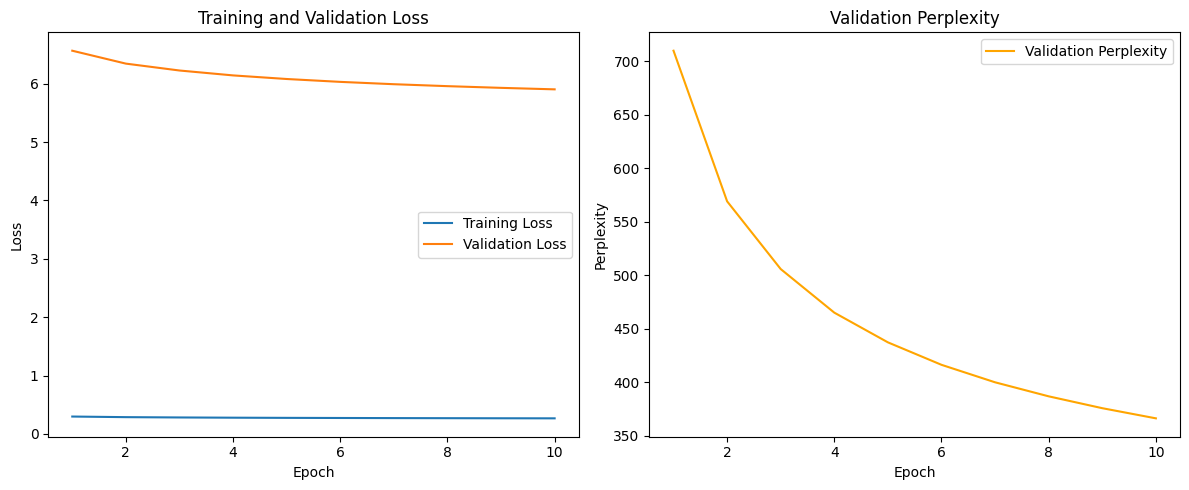

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot validation perplexity
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_perplexities, label='Validation Perplexity', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.title('Validation Perplexity')

plt.tight_layout()
plt.show()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [ ]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab)
    itos = vocab.vocab.get_itos()
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = itos[word_idx]
            words.append(word)
    return words

In [ ]:
"""
Yout code Here
"""

num_sentences = 3
sentence_length = 20

print("Epoch 2:\n")
for i in range(num_sentences):
    sentence = generate(model_epoch_2, vocab, nwords=sentence_length)
    print(f"Sentence {i+1}: {' '.join(sentence)}")
    print('-' * 50)

print("Epoch 5:\n")
for i in range(num_sentences):
    sentence = generate(model_epoch_5, vocab, nwords=sentence_length)
    print(f"Sentence {i+1}: {' '.join(sentence)}")
    print('-' * 50)

print("best model:\n")
for i in range(num_sentences):
    sentence = generate(best_model, vocab, nwords=sentence_length)
    print(f"Sentence {i+1}: {' '.join(sentence)}")
    print('-' * 50)

Epoch 2:

Sentence 1: in the lieutenant short era , <unk> castle as pain the characters . hoysala is the pass in one expo
--------------------------------------------------
Sentence 2: batch , and its marriage from a child , a speeds in money , including systems , including all bold
--------------------------------------------------
Sentence 3: seen of his position president ava and filming would becker . on to have been wielded little , iii @-@
--------------------------------------------------
Epoch 5:

Sentence 1: operations chief before halls largely watched . they died to preserve the volunteers , turtle <unk> flares and other sweden
--------------------------------------------------
Sentence 2: , and <unk> , powered at 50 unwillingness was communication forested upstaged , as well as <unk> running , although
--------------------------------------------------
Sentence 3: = = = = cm in flag = television was ophelia surroundings species outreach he was archpriest of the game
-------

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/